In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy.linalg as la

from sklearn.decomposition import PCA
from pca import pca
from factor_analyzer import FactorAnalyzer

from sklearn.cluster import KMeans

from statsmodels.multivariate.manova import MANOVA

# Carga de datos

In [76]:
data=pd.read_csv("../data/ms_authors.csv",dtype={"age":int,"time":int})
data["citationsProducts"]=data["citations"]/data["products"]
data["pressProducts"]=data["press"]/data["products"]
data["ageProducts"]=data["age"]/data["products"]
data["timeProducts"]=data["time"]/data["products"]
data

,products,citations,press,age,sex,time,level,category,citationsProducts,pressProducts,ageProducts,timeProducts
0,101,94,8,59,M,31,DOCTORADO,TITULAR,0.930693,0.079208,0.584158,0.306931
1,23,6,2,74,M,49,DOCTORADO,TITULAR,0.260870,0.086957,3.217391,2.130435
2,35,32,2,49,M,12,DOCTORADO,ASOCIADO,0.914286,0.057143,1.400000,0.342857
3,5,1,9,55,F,26,DOCTORADO,ASOCIADO,0.200000,1.800000,11.000000,5.200000
4,120,149,2,68,M,26,DOCTORADO,TITULAR,1.241667,0.016667,0.566667,0.216667
...,...,...,...,...,...,...,...,...,...,...,...,...
280,10,4,5,55,M,17,MAESTRIA,ASISTENTE,0.400000,0.500000,5.500000,1.700000
281,49,34,4,62,F,34,MAESTRIA,TITULAR,0.693878,0.081633,1.265306,0.693878
282,3,0,1,46,M,19,DOCTORADO,ASOCIADO,0.000000,0.333333,15.333333,6.333333
283,17,9,1,52,F,13,DOCTORADO,ASOCIADO,0.529412,0.058824,3.058824,0.764706


### Descripción de los datos
Los datos provienen de las dependencias puntaje y recurso humano de la universidad de antioquia. Con ellos realizamos un proceso de búsqueda de la aparición del investigador en medios de comunicación (prensa).
Ignoramos los docentes que no tienen producción científica.

Las variables se describen a continuación:
* products (int): Cantidad de publicaciones
* citations (int): Cantidad de veces que han sido citados todos los productos
* citations/products (float): Cantidad de citas dividido la cantidad de productos
* press (int): cantidad de artículos de prensa en los que ha aparecido el investigador
* age (int): Edad del investigador
* time (int): Años que el investigador ha estado en la universidad
* sex (str): Sexo del investigador
* level (str): Nivel académico
* category (str): Categoría

# Análisis exploratorio univariado

In [3]:
data.describe()

,products,citations,press,age,time,citations/products
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,39.178947,38.298246,5.849123,51.761404,16.410526,0.756697
std,60.027689,74.002799,16.079962,9.083295,9.243378,0.876958
min,1.000000,0.000000,1.000000,32.000000,2.000000,0.000000
25%,7.000000,2.000000,1.000000,45.000000,10.000000,0.187500
50%,20.000000,9.000000,2.000000,51.000000,16.000000,0.500000
75%,49.000000,45.000000,4.000000,59.000000,21.000000,1.000000
max,481.000000,675.000000,199.000000,79.000000,50.000000,5.843750


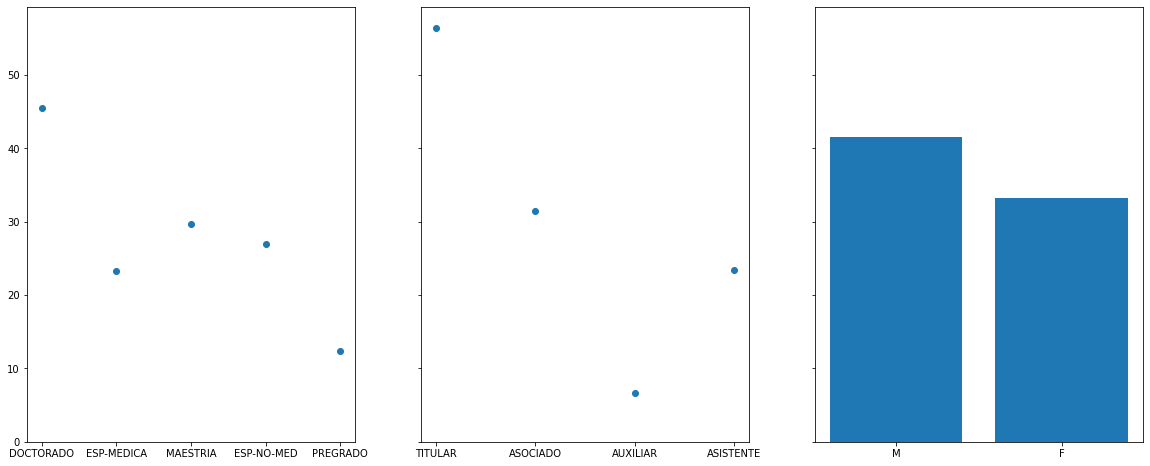

In [4]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["products"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["products"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["products"])
plt.show()

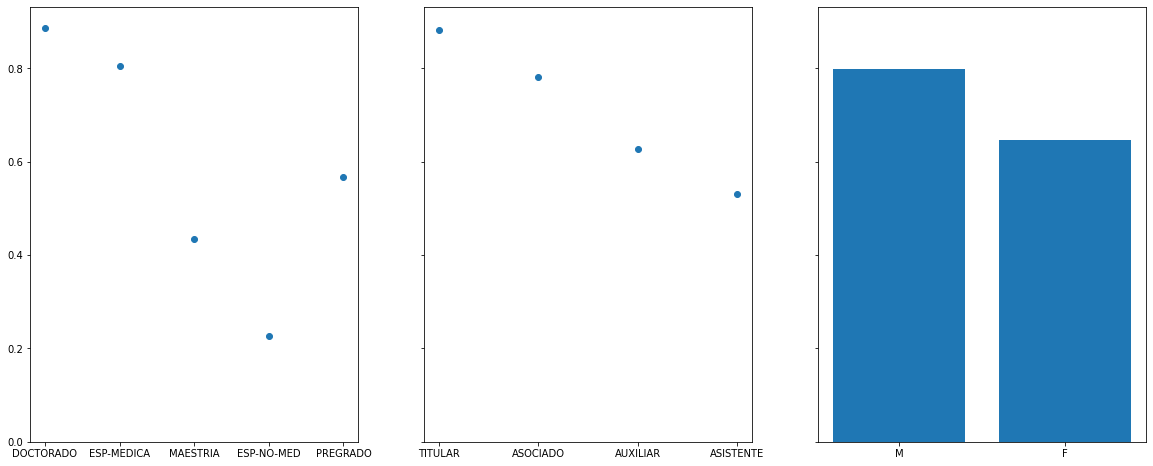

In [15]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["citations/products"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["citations/products"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["citations/products"])
plt.show()

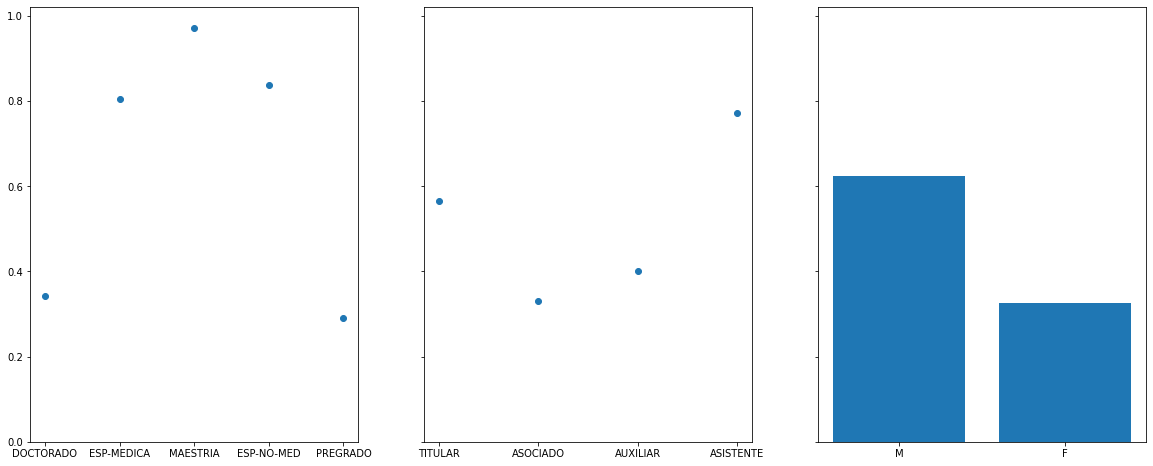

In [18]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["press/products"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["press/products"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["press/products"])
plt.show()

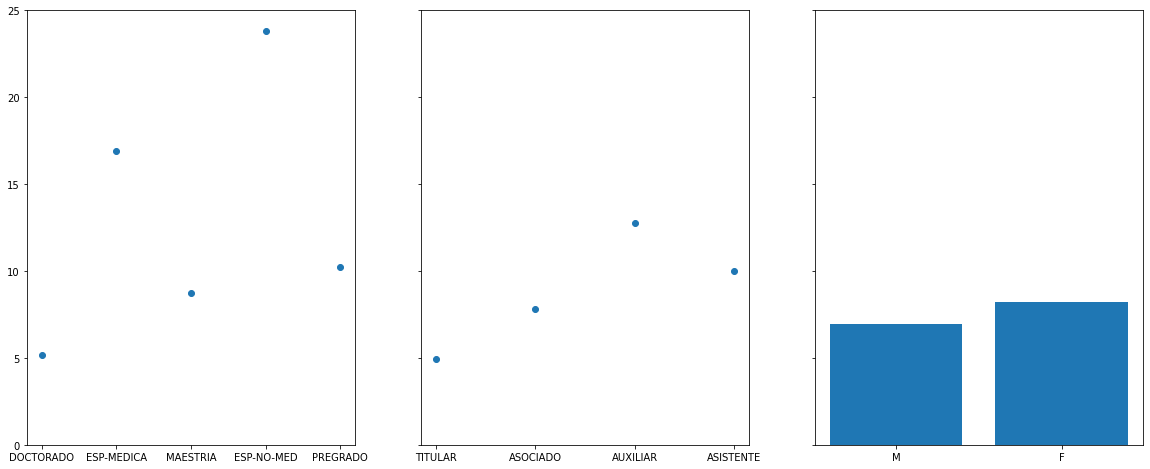

In [16]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["age/products"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["age/products"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["age/products"])
plt.show()

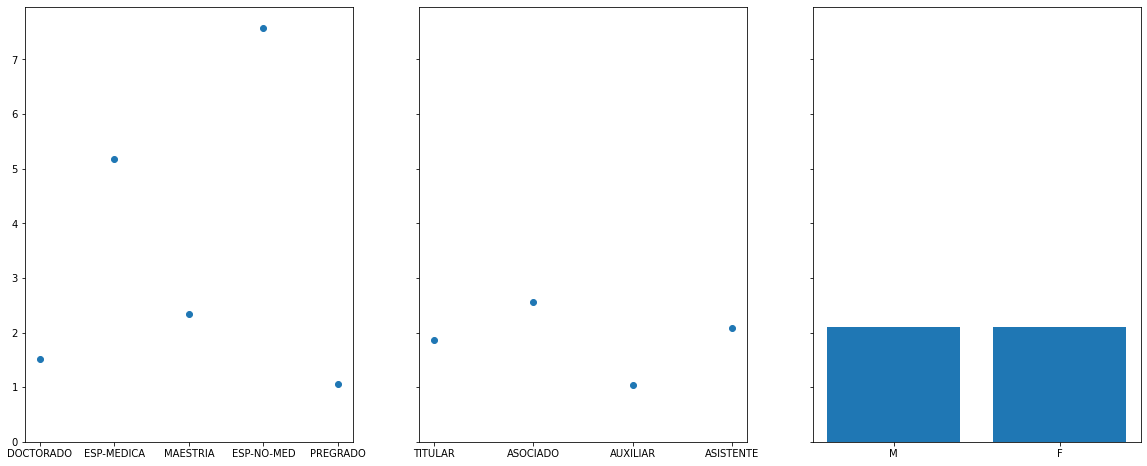

In [17]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["time/products"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["time/products"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["time/products"])
plt.show()

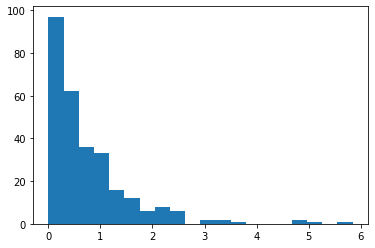

In [8]:
plt.hist(data["citations/products"],bins=20);

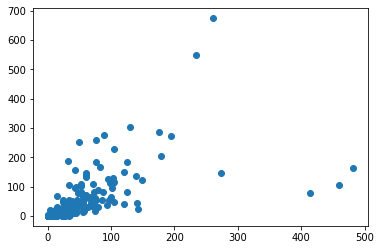

In [9]:
plt.plot(data["products"],data["citations"],"o");

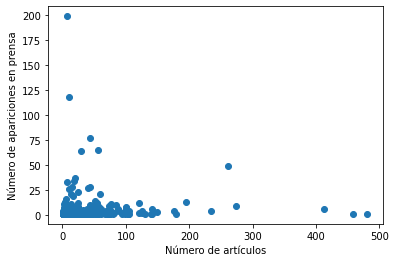

In [10]:
plt.plot(data["products"],data["press"],"o");
plt.xlabel("Número de artículos")
plt.ylabel("Número de apariciones en prensa")
plt.show()

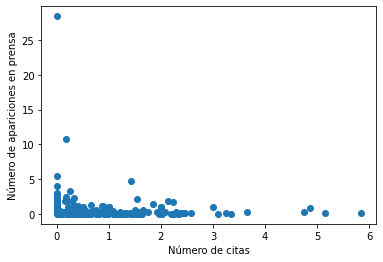

In [19]:
plt.plot(data["citations/products"],data["press/products"],"o");
plt.xlabel("Número de citas")
plt.ylabel("Número de apariciones en prensa")
plt.show()

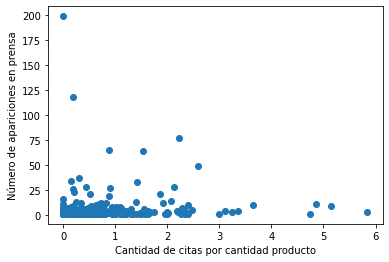

In [11]:
plt.plot(data["citations/products"],data["press"],"o");
plt.xlabel("Cantidad de citas por cantidad producto")
plt.ylabel("Número de apariciones en prensa")
plt.show()

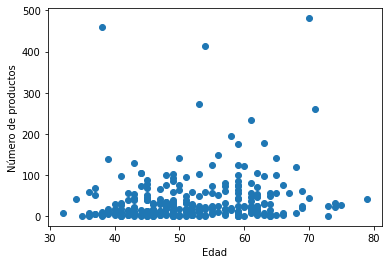

In [22]:
plt.plot(data["age"],data["products"],"o");
plt.xlabel("Edad")
plt.ylabel("Número de productos")
plt.show()

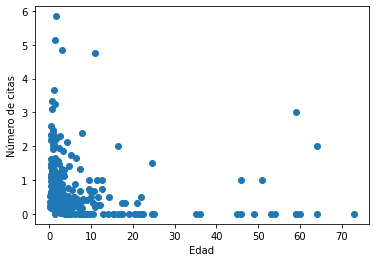

In [20]:
plt.plot(data["age/products"],data["citations/products"],"o");
plt.xlabel("Edad")
plt.ylabel("Número de citas")
plt.show()

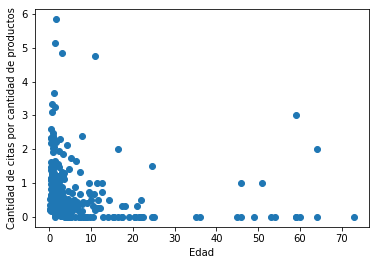

In [23]:
plt.plot(data["age/products"],data["citations/products"],"o");
plt.xlabel("Edad")
plt.ylabel("Cantidad de citas por cantidad de productos")
plt.show()

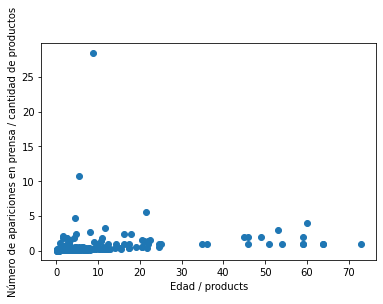

In [27]:
plt.plot(data["age/products"],data["press/products"],"o");
plt.xlabel("Edad / products")
plt.ylabel("Número de apariciones en prensa / cantidad de productos")
plt.show()

<AxesSubplot:xlabel='sex', ylabel='products'>

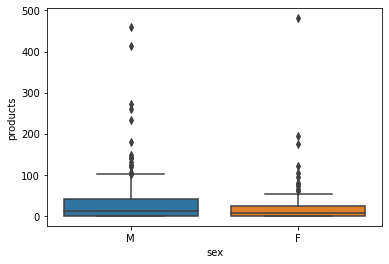

In [120]:
sns.boxplot(x="sex",y="products",data=data)

<AxesSubplot:xlabel='sex', ylabel='citations/products'>

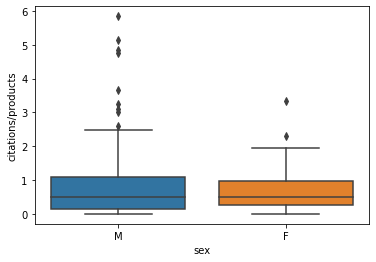

In [174]:
sns.boxplot(x="sex",y="citations/products",data=data)

<AxesSubplot:xlabel='level', ylabel='products'>

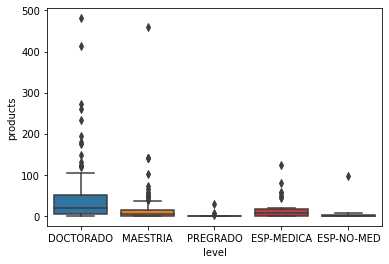

In [121]:
sns.boxplot(x="level",y="products",data=data)

<AxesSubplot:xlabel='level', ylabel='citations/products'>

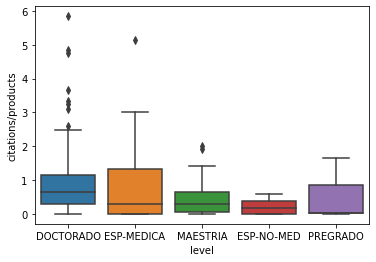

In [175]:
sns.boxplot(x="level",y="citations/products",data=data)

<AxesSubplot:xlabel='category', ylabel='products'>

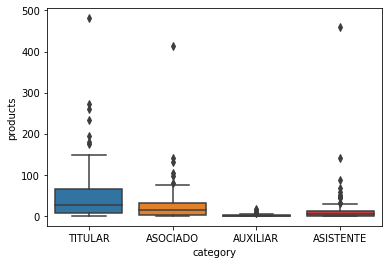

In [122]:
sns.boxplot(x="category",y="products",data=data)

<AxesSubplot:xlabel='category', ylabel='citations/products'>

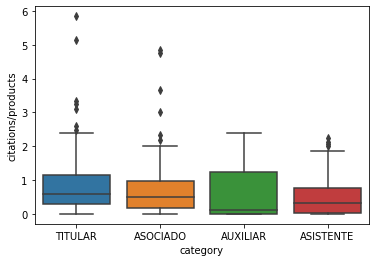

In [176]:
sns.boxplot(x="category",y="citations/products",data=data)

<AxesSubplot:xlabel='category', ylabel='age/products'>

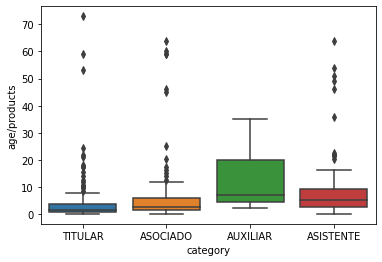

In [28]:
sns.boxplot(x="category",y="age/products",data=data)

<AxesSubplot:xlabel='level', ylabel='age/products'>

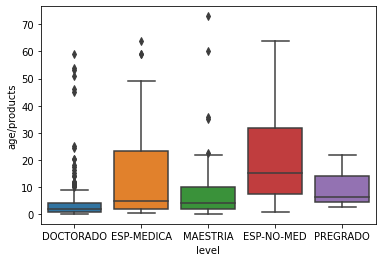

In [29]:
sns.boxplot(x="level",y="age/products",data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


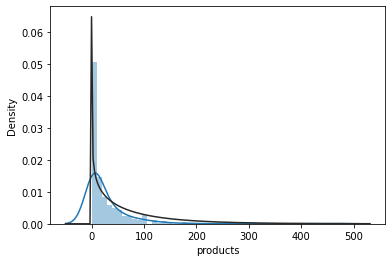

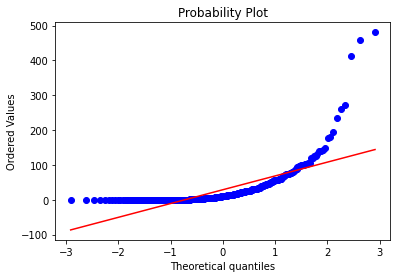

In [156]:
sns.distplot(data["products"],fit=stats.chi2);
plt.figure()
stats.probplot(data["products"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


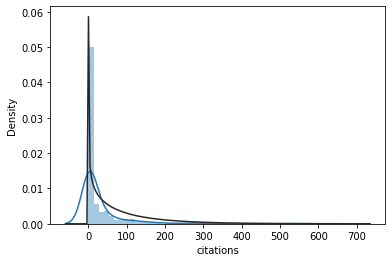

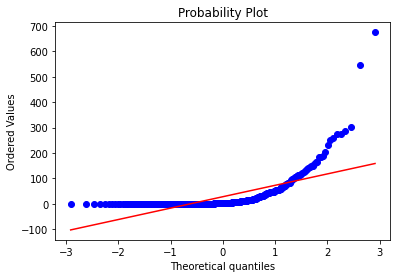

In [158]:
sns.distplot(data["citations"],fit=stats.chi2);
plt.figure()
stats.probplot(data["citations"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


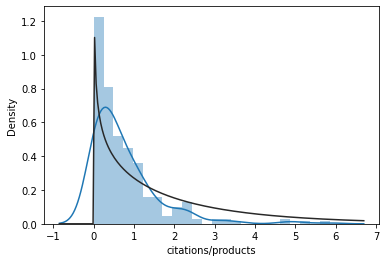

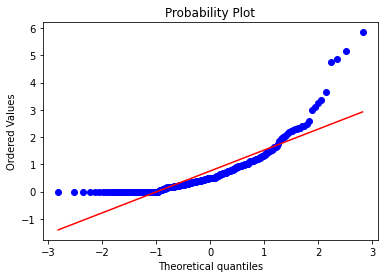

In [177]:
sns.distplot(data["citations/products"],fit=stats.chi2);
plt.figure()
stats.probplot(data["citations/products"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


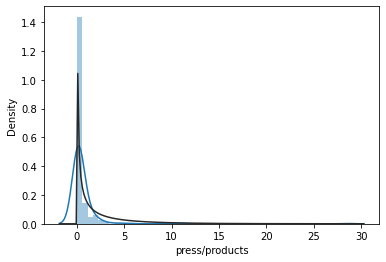

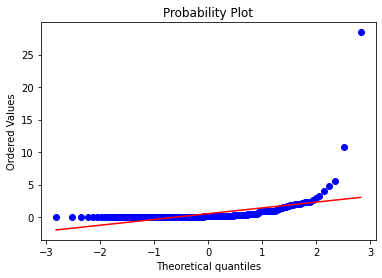

In [30]:
sns.distplot(data["press/products"],fit=stats.chi2);
plt.figure()
stats.probplot(data["press/products"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


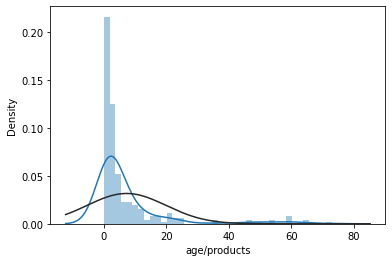

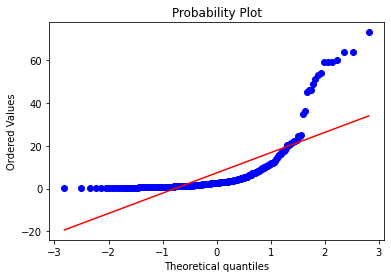

In [31]:
sns.distplot(data["age/products"],fit=stats.norm);
plt.figure()
stats.probplot(data["age/products"],plot=plt);

# Análisis exploratorio multivariado

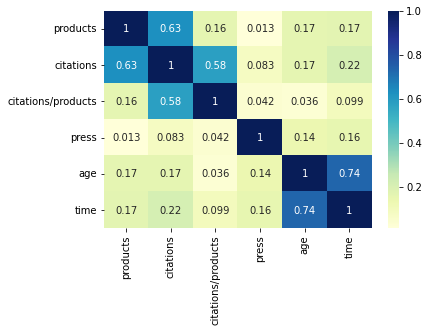

In [178]:
sns.heatmap(data[["products","citations","citations/products","press","age","time"]].corr(), cmap="YlGnBu", annot=True);

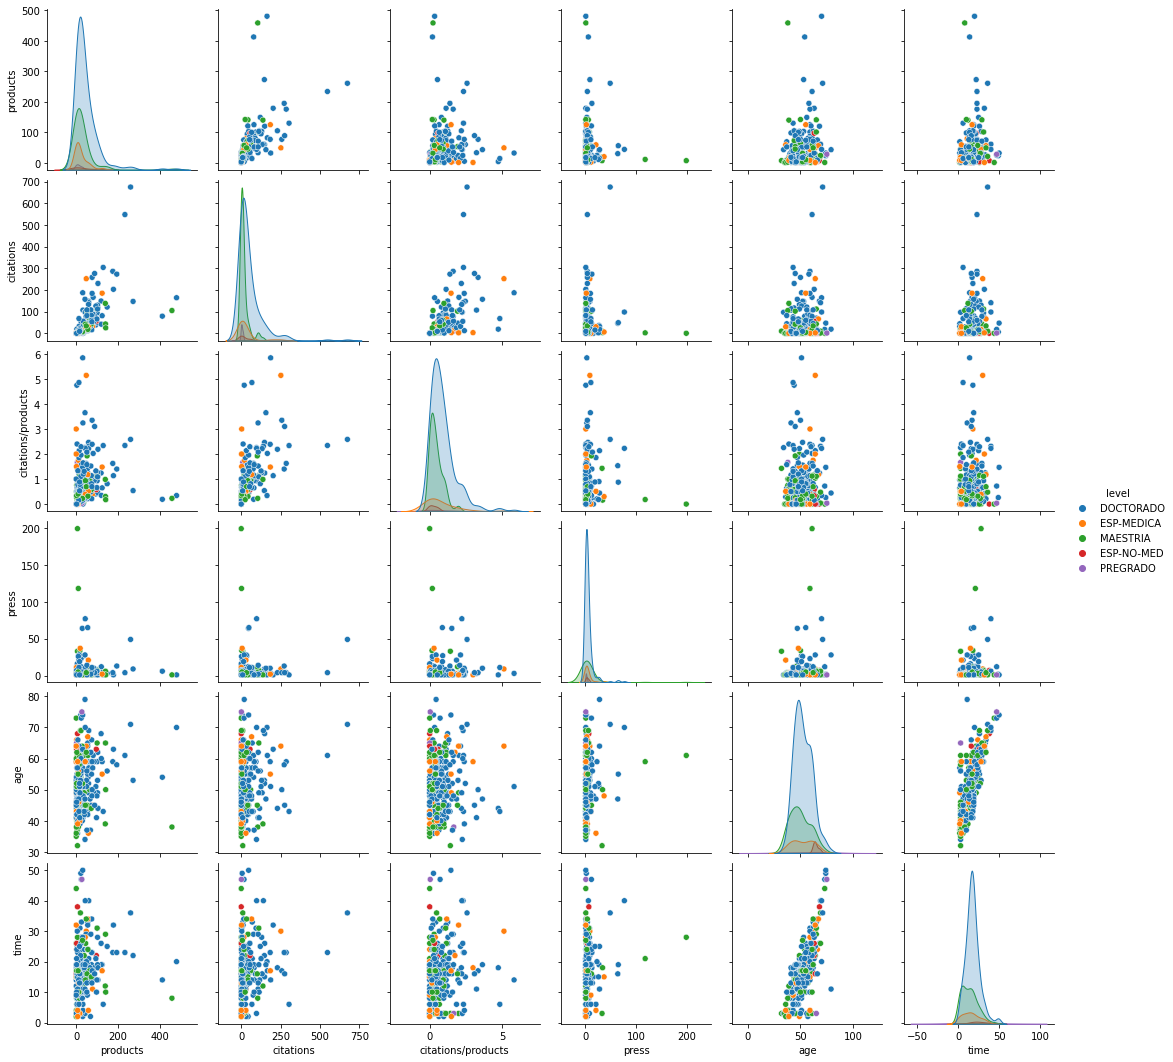

In [179]:
sns.pairplot(data[["products","citations","citations/products","press","age","time","level"]],kind="scatter",hue="level")

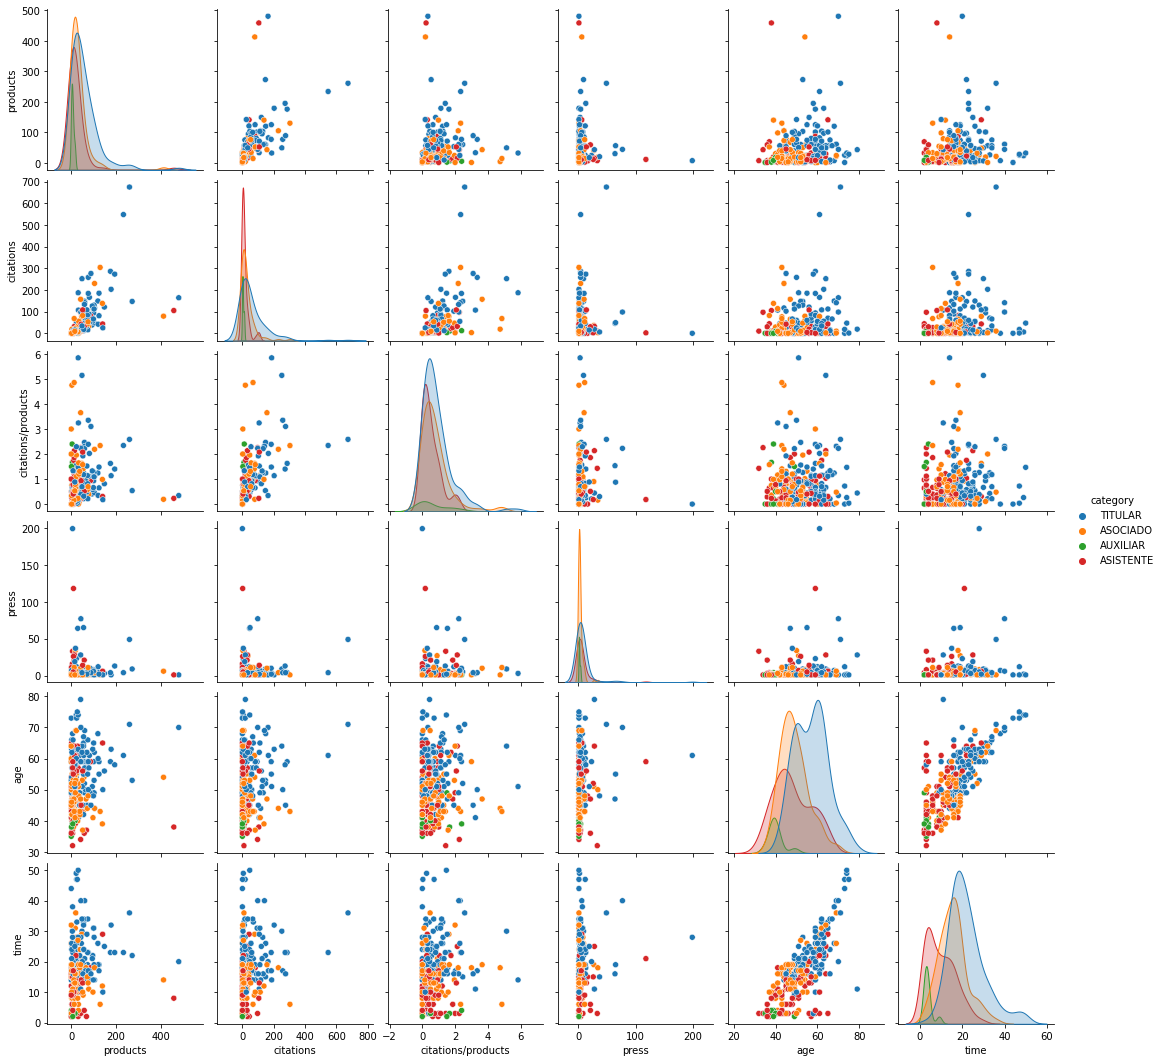

In [180]:
sns.pairplot(data[["products","citations","citations/products","press","age","time","category"]],kind="scatter",hue="category")

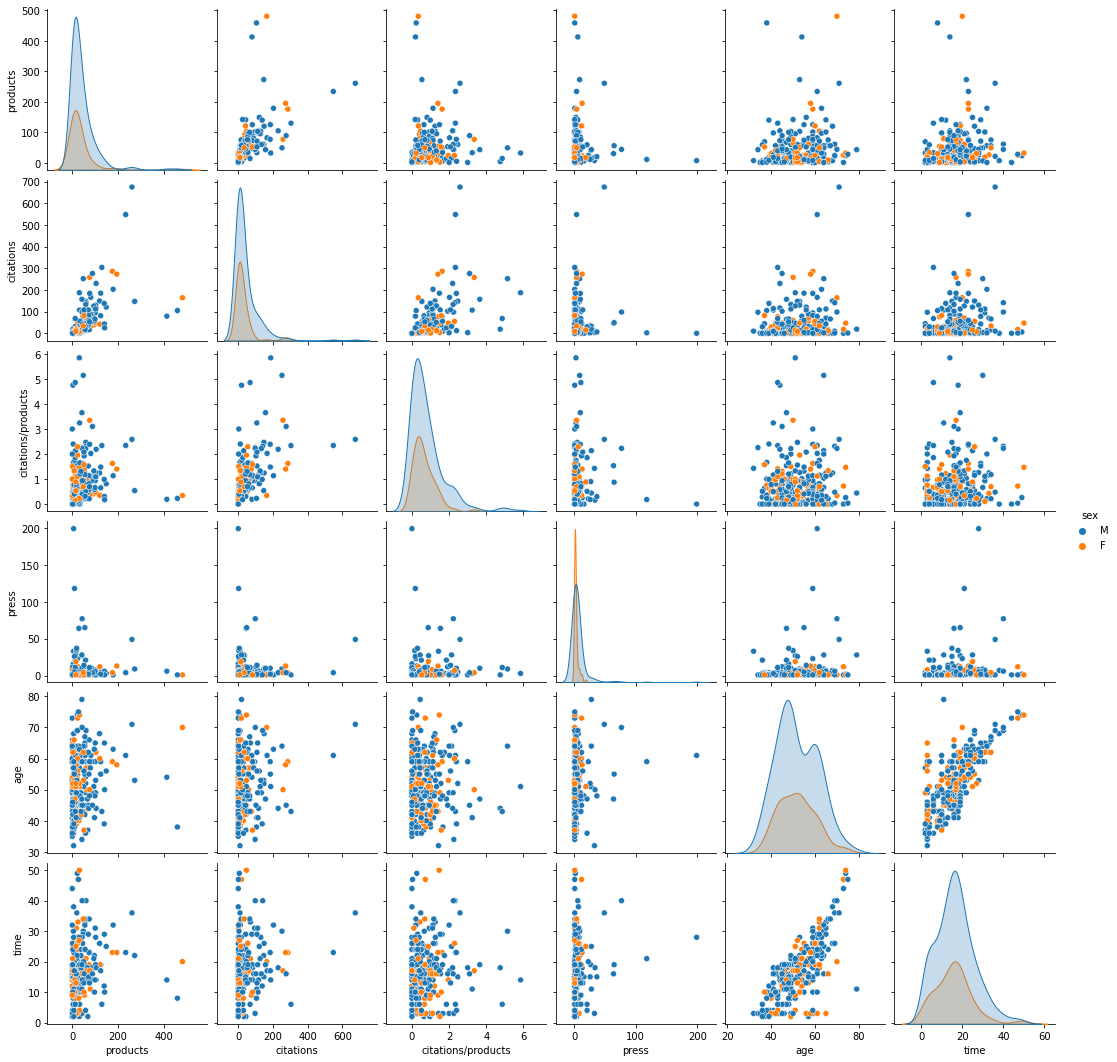

In [181]:
sns.pairplot(data[["products","citations","citations/products","press","age","time","sex"]],kind="scatter",hue="sex")

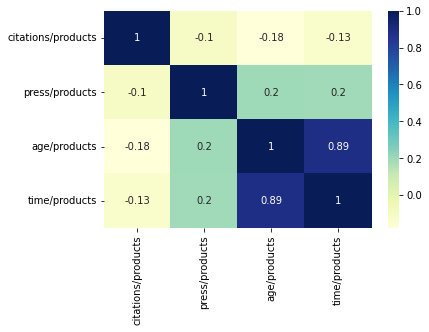

In [32]:
sns.heatmap(data[["citations/products","press/products","age/products","time/products"]].corr(), cmap="YlGnBu", annot=True);

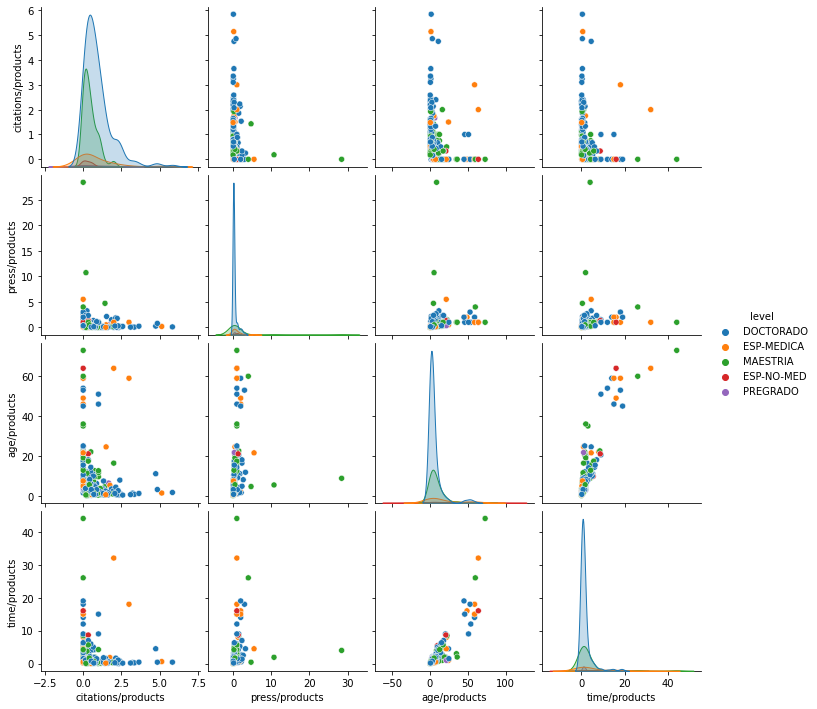

In [12]:
sns.pairplot(data[["citations/products","press/products","age/products","time/products","level"]],kind="scatter",hue="level")

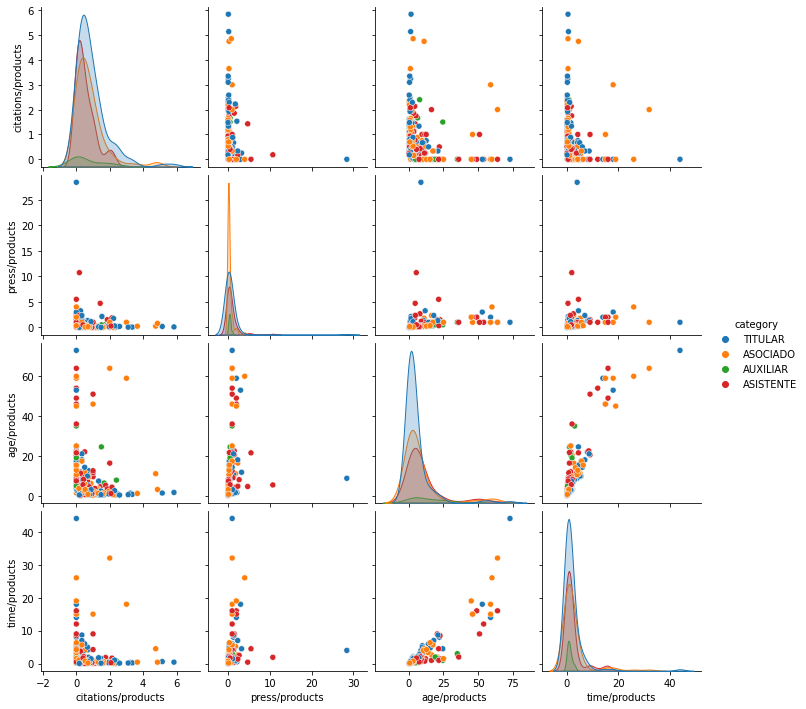

In [13]:
sns.pairplot(data[["citations/products","press/products","age/products","time/products","category"]],kind="scatter",hue="category")

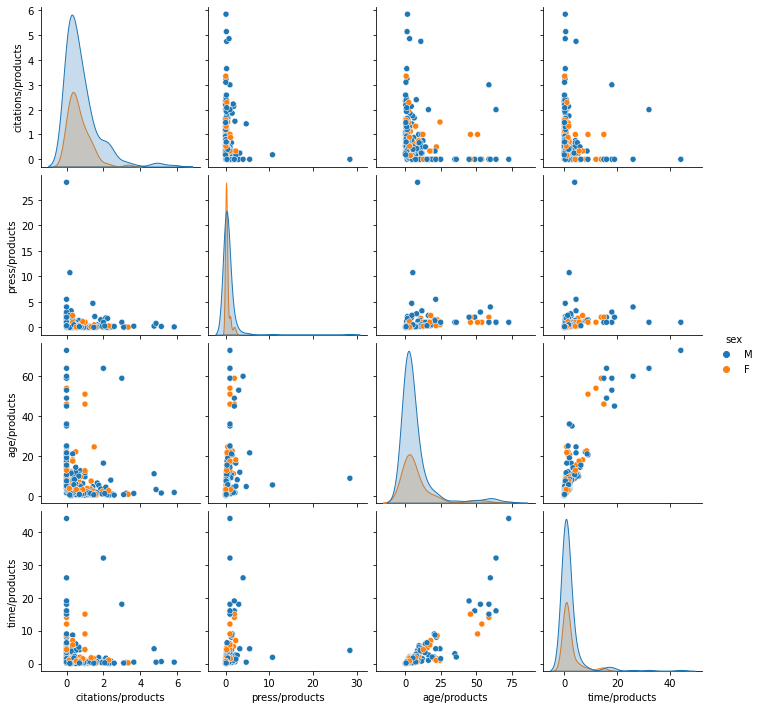

In [14]:
sns.pairplot(data[["citations/products","press/products","age/products","time/products","sex"]],kind="scatter",hue="sex")

# PCA

In [33]:
pca_data=data[["products","citations","press","age","time","citations/products"]]

In [35]:
np.std(pca_data)
#calcular coeficiente de variabilidad
#explorar variables relativas con productos principalmente

products              59.922285
citations             73.872855
press                 16.051727
age                    9.067346
time                   9.227147
citations/products     0.875418
dtype: float64

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


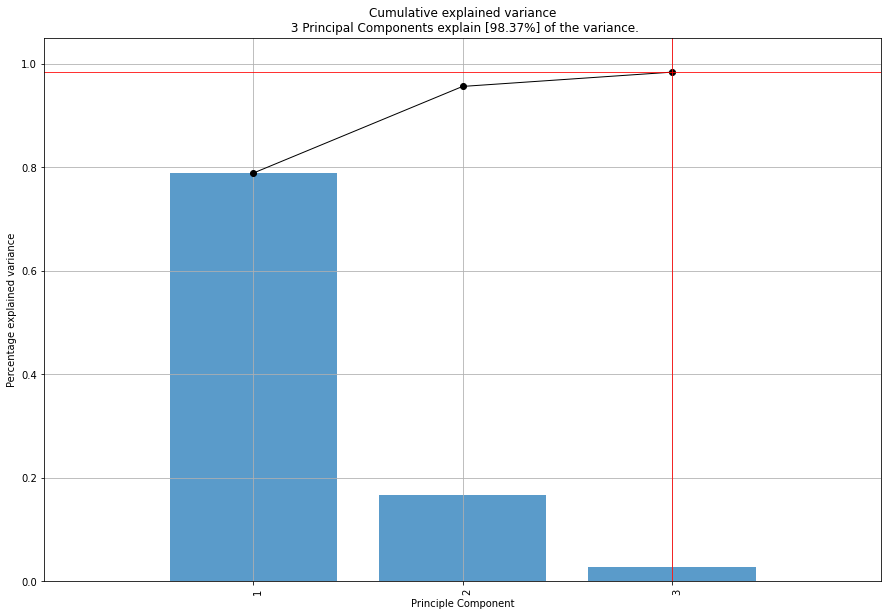

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

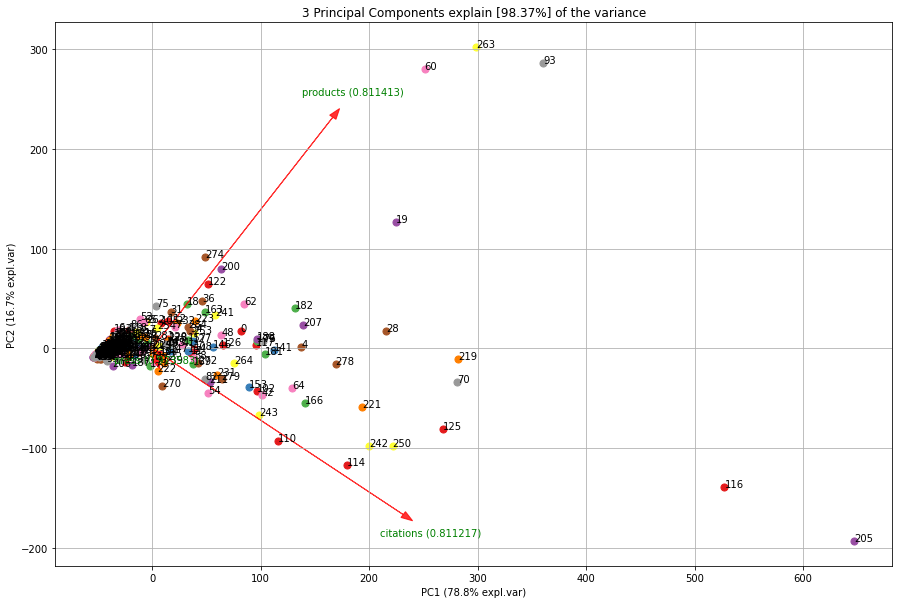

In [55]:
model=pca(n_components=3)
results=model.fit_transform(pca_data)
#fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=3,legend=False)

In [6]:
pca_data=data[["citations/products","press/products","age/products","time/products"]]

In [7]:
np.std(pca_data)

citations/products     0.875418
press/products         1.904588
age/products          12.638405
time/products          4.619760
dtype: float64

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


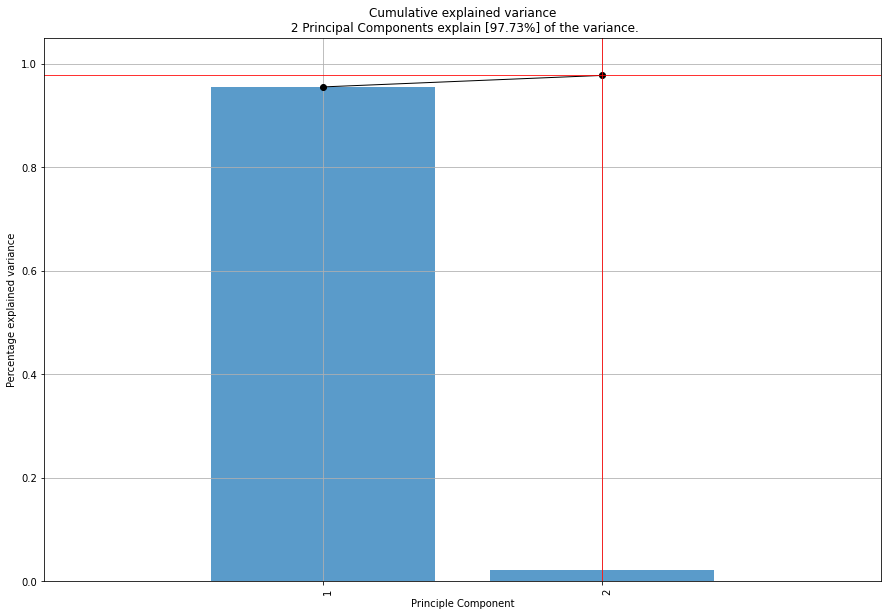

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

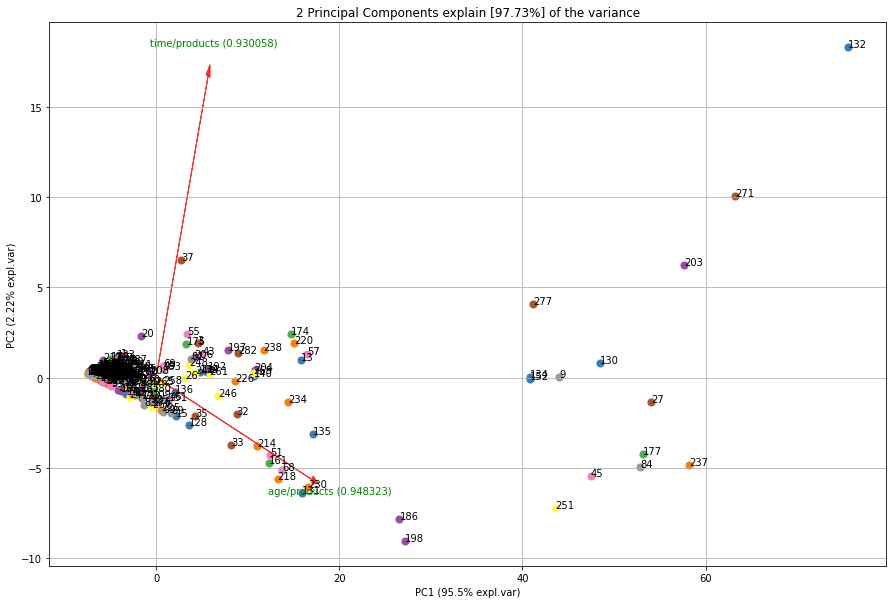

In [8]:
model=pca(n_components=2)
results=model.fit_transform(pca_data)
#fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=2,legend=False)

In [9]:
model.results

{'loadings':      citations/products  press/products  age/products  time/products
 PC1           -0.011662        0.029253      0.948323       0.315740
 PC2            0.032876        0.186245     -0.314999       0.930058,
 'PC':           PC1       PC2
 0   -6.955135  0.372910
 1   -3.874188  1.218830
 2   -6.170564  0.144685
 3    4.526245  1.939231
 4   -7.005679  0.293045
 ..        ...       ...
 280 -1.834983  0.180982
 281 -6.184179  0.510898
 282  8.952911  1.348565
 283 -4.459731  0.002161
 284 -6.948429  0.236132
 
 [285 rows x 2 columns],
 'explained_var': array([0.95518355, 0.97739191]),
 'variance_ratio': array([0.95518355, 0.02220836]),
 'model': PCA(n_components=2),
 'scaler': None,
 'pcp': 0.9773919059398299,
 'topfeat':     PC             feature   loading  type
 0  PC1        age/products  0.948323  best
 1  PC2       time/products  0.930058  best
 2  PC2  citations/products  0.032876  weak
 3  PC2      press/products  0.186245  weak,
 'outliers':       y_proba   y_sc

In [34]:
model.alpha

0.05

In [12]:
model.results["PC"]

,PC1,PC2
0,-6.955135,0.372910
1,-3.874188,1.218830
2,-6.170564,0.144685
3,4.526245,1.939231
4,-7.005679,0.293045
...,...,...
280,-1.834983,0.180982
281,-6.184179,0.510898
282,8.952911,1.348565
283,-4.459731,0.002161


## Factor analisis

In [14]:
factor_data=data[["citations/products","press/products","age/products","time/products"]]

In [15]:
fa = FactorAnalyzer()
fa.set_params(n_factors=2, rotation=None)
fa.fit(factor_data)

FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

In [17]:
fa.get_eigenvalues()

(array([2.02346485, 0.97321591, 0.89231886, 0.11100038]),
 array([ 1.86486754e+00,  2.73075591e-01,  5.95948228e-08, -1.05112898e-07]))

In [18]:
fa.get_communalities()

array([0.28017131, 0.06265791, 0.83217682, 0.96293704])

In [21]:
var=1-np.sum(fa.get_communalities()[:2]**2)
var

0.9175780242151678

In [23]:
fa_varimax = FactorAnalyzer(rotation='varimax')
fa_varimax.fit(factor_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [24]:
fa_varimax.get_communalities()

array([0.13149639, 0.12681596, 0.91873521, 0.90758833])

In [25]:
var=1-np.sum(fa.get_communalities()[:2]**2)
var

0.9175780242151678

# Clustering

In [53]:
data_clustering=data[["citations/products","press/products","age/products","time/products"]]

In [54]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_clustering)
kprediction=kmeans.predict(data_clustering)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9ad8f959d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [55]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.77568313,  0.48008556,  4.56970649,  1.20243959],
       [ 0.4375    ,  1.5625    , 53.3125    , 17.125     ]])

In [60]:
centroids[0,[0,2]],centroids[1,[0,2]]

(array([0.77568313, 4.56970649]), array([ 0.4375, 53.3125]))

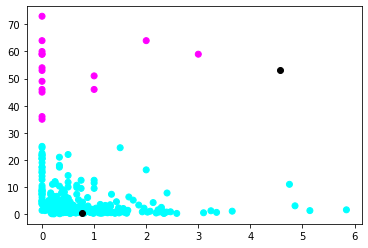

In [61]:
plt.scatter(data["citations/products"],data["age/products"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[0,2]],centroids[1,[0,2]],c="black")

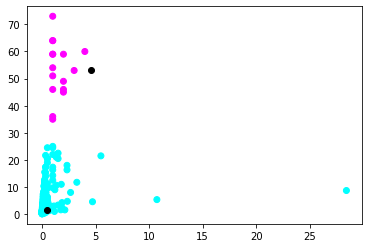

In [62]:
plt.scatter(data["press/products"],data["age/products"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[1,2]],centroids[1,[1,2]],c="black")

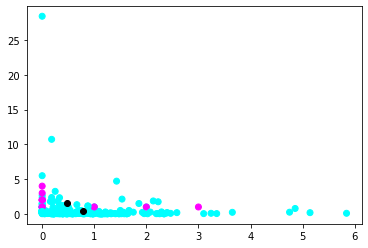

In [63]:
plt.scatter(data["citations/products"],data["press/products"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[0,1]],centroids[1,[0,1]],c="black")

### With results from PCA

In [48]:
data_clustering=model.results["PC"][["PC1","PC2"]]
kmeans=KMeans(n_clusters=2)
kmeans.fit(data_clustering)
kprediction=kmeans.predict(data_clustering)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9abec95ee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [49]:
centroids= kmeans.cluster_centers_
centroids

array([[ 4.84076440e+01, -3.34662807e-01],
       [-2.87926507e+00,  1.99055945e-02]])

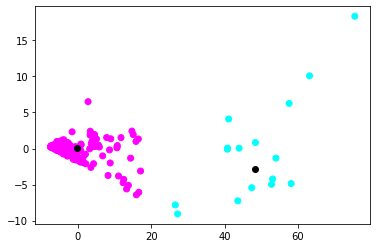

In [52]:
plt.scatter(data_clustering["PC1"],data_clustering["PC2"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,:],centroids[1,:],c="black")

# MANOVA

In [90]:
data_manova=data[["citationsProducts","pressProducts","ageProducts","timeProducts","category"]]

In [92]:
manova = MANOVA.from_formula("citationsProducts + pressProducts + ageProducts ~ category",data=data_manova)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7575 3.0000 279.0000 29.7684 0.0000
         Pillai's trace 0.2425 3.0000 279.0000 29.7684 0.0000
 Hotelling-Lawley trace 0.3201 3.0000 279.0000 29.7684 0.0000
    Roy's greatest root 0.3201 3.0000 279.0000 29.7684 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        category        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9417 9.0000 679.1633  1.8871 0.0509
         Pillai's trace 0.0589 9.0000 843.0000  1.8743 0.0524
 Hotelling-Lawley trace 0.

In [93]:
data_manova = model.results["PC"][["PC1","PC2"]]
data_manova=data_manova.join(data["category"])
data_manova.columns

Index(['PC1', 'PC2', 'category'], dtype='object')

In [94]:
manova = MANOVA.from_formula("PC1 + PC2 ~ category",data=data_manova)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9434 2.0000 280.0000  8.4023 0.0003
         Pillai's trace 0.0566 2.0000 280.0000  8.4023 0.0003
 Hotelling-Lawley trace 0.0600 2.0000 280.0000  8.4023 0.0003
    Roy's greatest root 0.0600 2.0000 280.0000  8.4023 0.0003
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        category        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8343 6.0000 560.0000  8.8460 0.0000
         Pillai's trace 0.1664 6.0000 562.0000  8.5031 0.0000
 Hotelling-Lawley trace 0.